### Importing Packages

In [281]:
import pandas as pd
import numpy as np

### Reading Data

In [282]:
train_data = pd.read_csv('au_train_clean.csv')
test_data = pd.read_csv('au_test.csv', na_values = [' ?'])

In [283]:
train_data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [284]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [285]:
test_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


### Test and Train data Dimensions

In [286]:
test_data.shape

(16281, 15)

In [287]:
train_data.shape

(30162, 16)

### Data Cleaning

In [288]:
train_data = train_data.drop(columns = ['Unnamed: 0'])


In [289]:
test_data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64

In [290]:
test_data = test_data.dropna()

In [291]:
test_data.shape

(15060, 15)

### Splitting Dependant and Independant Variable

In [292]:
train_data_x1 = train_data.drop(columns = ['class'])
train_data_xtar = train_data['class']

test_data_y1 = test_data.drop(columns = ['class'])
test_data_ytar = test_data['class']



In [293]:
# train_data_x1 = pd.get_dummies(train_data_x1)
# test_data_y1 = pd.get_dummies(test_data_y1)

### Creating Dummies for Categorical features

In [294]:
data = train_data_x1.append(test_data_y1, ignore_index = True)

In [295]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
45217,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
45218,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
45219,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
45220,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States
45221,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States


In [296]:
data = pd.get_dummies(data)

In [297]:
train_d = data.iloc[0:30162,]

In [298]:
test_d = data.iloc[30162:]

### Factorizing Dependant feature

In [299]:
train_tar= train_data_xtar.factorize()[0]
test_tar = test_data_ytar.factorize()[0]

#data['income'] = data['income'].map({'<=50K': 0, '>50K': 1}) 

### Logistic Regression

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(train_d,train_tar)
pred = model.predict(test_d)


C:\Users\ramss\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Model Metrics

In [301]:
print('The accuracy of Logistic Model is :', round(metrics.accuracy_score(test_tar,pred) *100,2))

The accuracy of Logistic Model is : 79.27


In [302]:

cnf_matrix = metrics.confusion_matrix(test_tar, pred)
# cnf_matrix

In [303]:
index = pd.Series(['<=50k', '>50k'])
cn_df = pd.DataFrame(cnf_matrix, columns = ['<=50k', '>50k'], index = index)

cn_df

,<=50k,>50k
<=50k,10950,410
>50k,2712,988


 The number of people earnign over 50k is 988

### Random Forest Classifier

In [304]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_d = sc.fit_transform(train_d)
test_d = sc.transform(test_d)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(train_d, train_tar)
pred0 = clf.predict(test_d)
ac = metrics.accuracy_score(test_tar,pred0)
print('Accuracy for Random Forest Classifier:' ,round(ac*100,2))

C:\Users\ramss\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ramss\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\ramss\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\ramss\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy for Random Forest Classifier: 84.02


In [305]:

cnf_matrix_r = metrics.confusion_matrix(test_tar, pred0)

cn_df_r = pd.DataFrame(cnf_matrix_r, columns = ['<=50k', '>50k'], index = index)

cn_df_r

,<=50k,>50k
<=50k,10517,843
>50k,1563,2137


By comparing the two models accuracy, its seen that Logistic regression performs better.

### Roc Curve for RandomForest Classifier

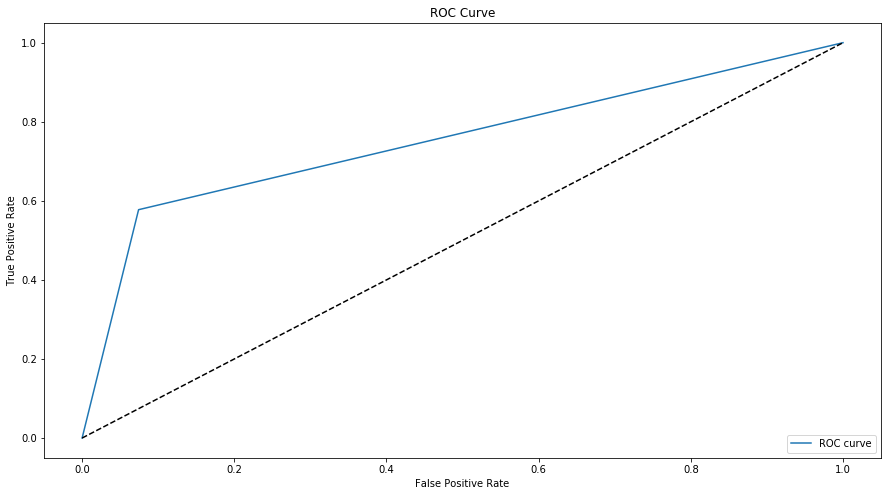

In [306]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
fpr1, tpr1, thresholds1 = roc_curve(test_tar, pred0)
plt.plot(fpr1, tpr1, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [307]:
from sklearn.metrics import auc
area_ra = auc(fpr1,tpr1)
print("The rate of Successful classification for Random Forest: ",round(area_ra * 100,2))

The rate of Successful classification for Random Forest:  75.17


### ROC Curve for Logistic Regression

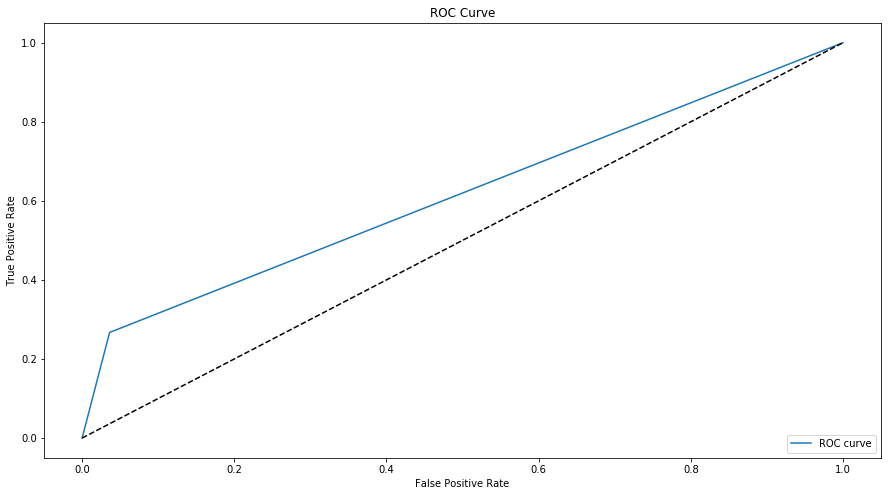

In [308]:

plt.figure(figsize = (15,8))
fpr, tpr, thresholds = roc_curve(test_tar, pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [309]:

area = auc(fpr,tpr)
print("The rate of Successful classification for Logistic regession: ",round(area * 100,2))

The rate of Successful classification for Logistic regession:  61.55


### Precision Recall Metrics

In [310]:
#Logistic Regression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from inspect import signature
print("Precision Score for logistic regression:" , round(precision_score(test_tar, pred) * 100,2))
print("Recall score for logistic regression:" , round(recall_score(test_tar, pred) * 100,2))

Precision Score for logistic regression: 70.67
Recall score for logistic regression: 26.7


In [311]:
print("Precision Score for Random Forest:" , round(precision_score(test_tar, pred0) * 100,2))
print("Recall score for Random Forest:" , round(recall_score(test_tar, pred0) * 100,2))

Precision Score for Random Forest: 71.71
Recall score for Random Forest: 57.76
